# Coffee House Customer Retention

## Data Analysis

### Import Libraries

In [34]:
import pandas as pd
from itertools import combinations, product
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Read Data

In [6]:
df = pd.read_csv('./data/cleaned_data.csv')
df

,gender,age,employment status,annual income,coffee visits,mode,time spent,distance,membership,avg. spent,quality,price,promotion,ambiance,wifi,service,meetups,satisfied
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,4,3,5,5,4,4,3,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,4,3,4,4,4,5,2,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,4,3,4,4,4,4,3,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,2,1,4,3,3,3,3,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,3,3,4,2,2,3,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,More than 1 hour,1km - 3km,Yes,Around RM20 - RM40,3,3,5,3,2,4,4,Yes
117,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,More than 1 hour,1km - 3km,Yes,More than RM40,5,5,5,5,5,5,5,Yes
118,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Less than RM20,3,2,4,3,3,3,4,No
119,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Less than RM20,4,4,4,4,4,4,4,Yes


### Correlation Analysis

In [5]:
# Chi squared test
def chi2(X, correction=True):
    col_pairs = list(combinations(X.columns, 2))
    results_list = []
    for col1, col2 in col_pairs:
        contingency = pd.crosstab(
            X[col1],
            X[col2]
        )
        chi2, p_val, dof, exp_freq = stats.chi2_contingency(
            contingency.values, correction=correction
        )
        results_list.append([col1, col2, chi2, p_val, dof])
    results = pd.DataFrame(
        results_list,
        columns=[
            'column1', 'column2', 'chi_squared', 'p_value', 'dof'
        ]
    )
    return results

In [17]:
chi_sqr = chi2(df.drop('satisfied', axis=1))
chi_sqr.sort_values(by='p_value')

,column1,column2,chi_squared,p_value,dof
131,ambiance,service,98.818982,5.763924e-14,16
119,quality,service,95.746845,2.157746e-13,16
117,quality,ambiance,91.373334,1.396184e-12,16
135,service,meetups,88.765559,4.220583e-12,16
133,wifi,service,86.040764,1.332612e-11,16
...,...,...,...,...,...
71,mode,distance,2.292807,8.908971e-01,6
97,distance,wifi,3.545595,8.956224e-01,8
29,age,service,6.325967,8.987669e-01,12
89,time spent,service,3.001456,9.342662e-01,8


### Label Encoding

In [21]:
encoder = LabelEncoder()
df['age'] = encoder.fit_transform(df['age'])
df['employment status'] = encoder.fit_transform(df['employment status'])
df['annual income'] = encoder.fit_transform(df['annual income'])
df['coffee visits'] = encoder.fit_transform(df['coffee visits'])
df['time spent'] = encoder.fit_transform(df['time spent'])
df['distance'] = encoder.fit_transform(df['distance'])
df['membership'] = encoder.fit_transform(df['membership'])
df['avg. spent'] = encoder.fit_transform(df['avg. spent'])
df['satisfied'] = encoder.fit_transform(df['satisfied'])

### One Hot Encoding

In [22]:
df = pd.concat([df.drop(columns=['gender', 'mode']), pd.get_dummies(df[['gender', 'mode']], dtype=int)], axis=1)

### Pairplot

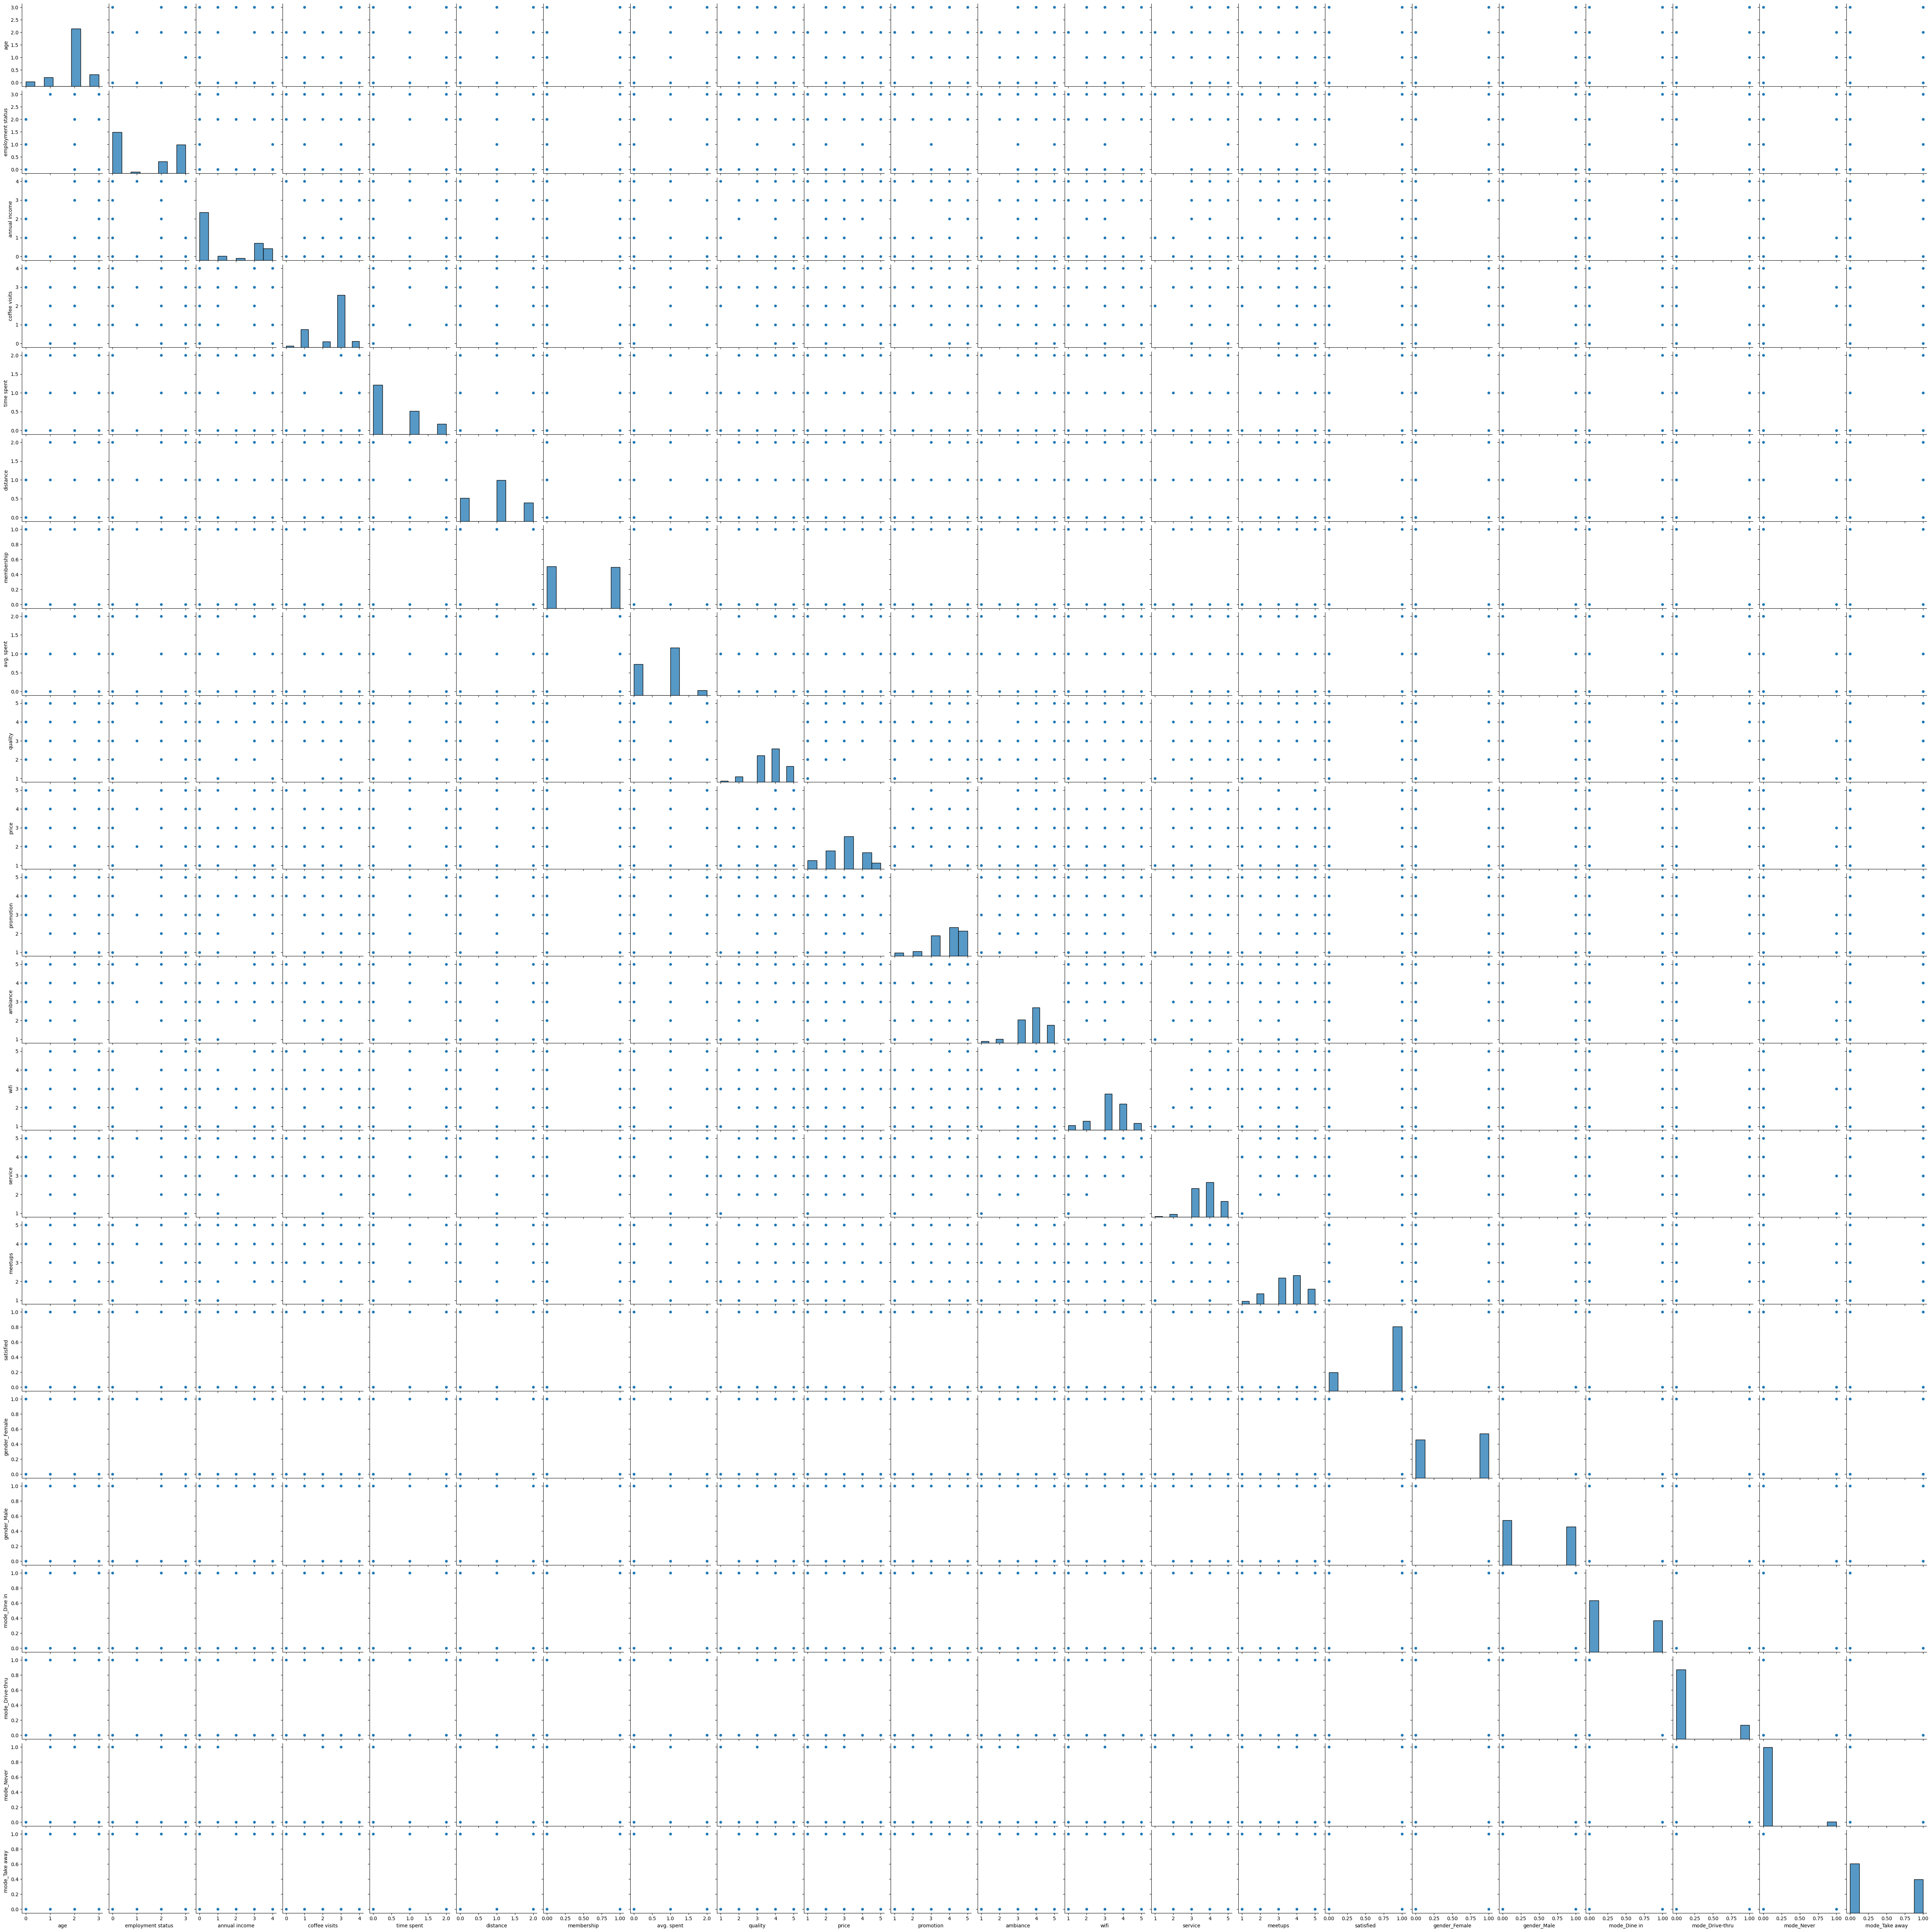

In [40]:
sns.pairplot(df)

### Correlation Matrix

<Axes: >

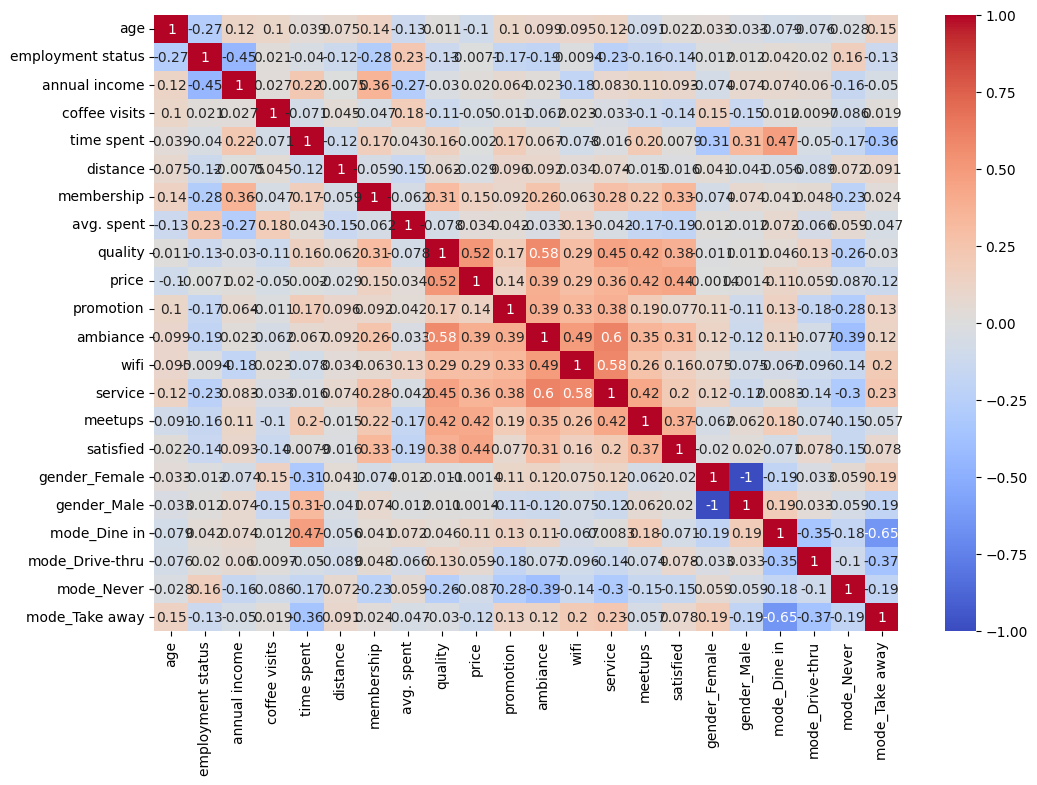

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### VIF Analysis

In [38]:
# Add a constant column to the DataFrame of dummy variables
X_dummies = add_constant(df.drop(columns=['satisfied', 'gender_Female', 'gender_Male', 'mode_Dine in', 'mode_Drive-thru', 'mode_Never', 'mode_Take away'], axis=1))

# Compute VIF for each dummy variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X_dummies.columns
vif_data['VIF'] = [variance_inflation_factor(X_dummies.values, i) for i in range(X_dummies.shape[1])]

print("Variance Inflation Factors for Dummy Variables:")
print(vif_data)


Variance Inflation Factors for Dummy Variables:
              Feature        VIF
0               const  62.369632
1                 age   1.191060
2   employment status   1.484438
3       annual income   1.674566
4       coffee visits   1.085700
5          time spent   1.289043
6            distance   1.088949
7          membership   1.381142
8          avg. spent   1.295091
9             quality   2.071850
10              price   1.601020
11          promotion   1.344697
12           ambiance   2.153739
13               wifi   1.828158
14            service   2.270631
15            meetups   1.594594


### Save Data

In [39]:
df.to_csv('./data/transformed_data.csv', index=False)